Import All Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import euclidean

Exploratory Data Analysis

In [2]:
df = pd.read_csv("Agricultural Dataset.csv")

In [3]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04-03-2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04-03-2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04-03-2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04-03-2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04-03-2019,110000,130000,120000


In [4]:
df.tail()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04-03-2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04-03-2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04-03-2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04-03-2019,3450,3550,3500
2237,West Bengal,Uttar Dinajpur,Raiganj,Wheat,Kalyan,04-03-2019,2075,2125,2100


In [5]:
df.shape

(2238, 9)

In [6]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [8]:
df.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


In [9]:
state_count = df.state.value_counts()
state_count_greater_40 = state_count[state_count>30]
print(state_count_greater_40)
print(len(state_count_greater_40))

state
Uttar Pradesh       574
Kerala              274
Tamil Nadu          183
Punjab              180
West Bengal         162
Maharashtra         162
Gujarat             113
Himachal Pradesh    102
Odisha               86
Haryana              65
Assam                58
Manipur              52
Madhya Pradesh       44
Rajasthan            41
Karnataka            36
Name: count, dtype: int64
15


Conclusion : The majority of states(15 out of 26) have significant contribution in farming sector of india.

<Axes: xlabel='commodity'>

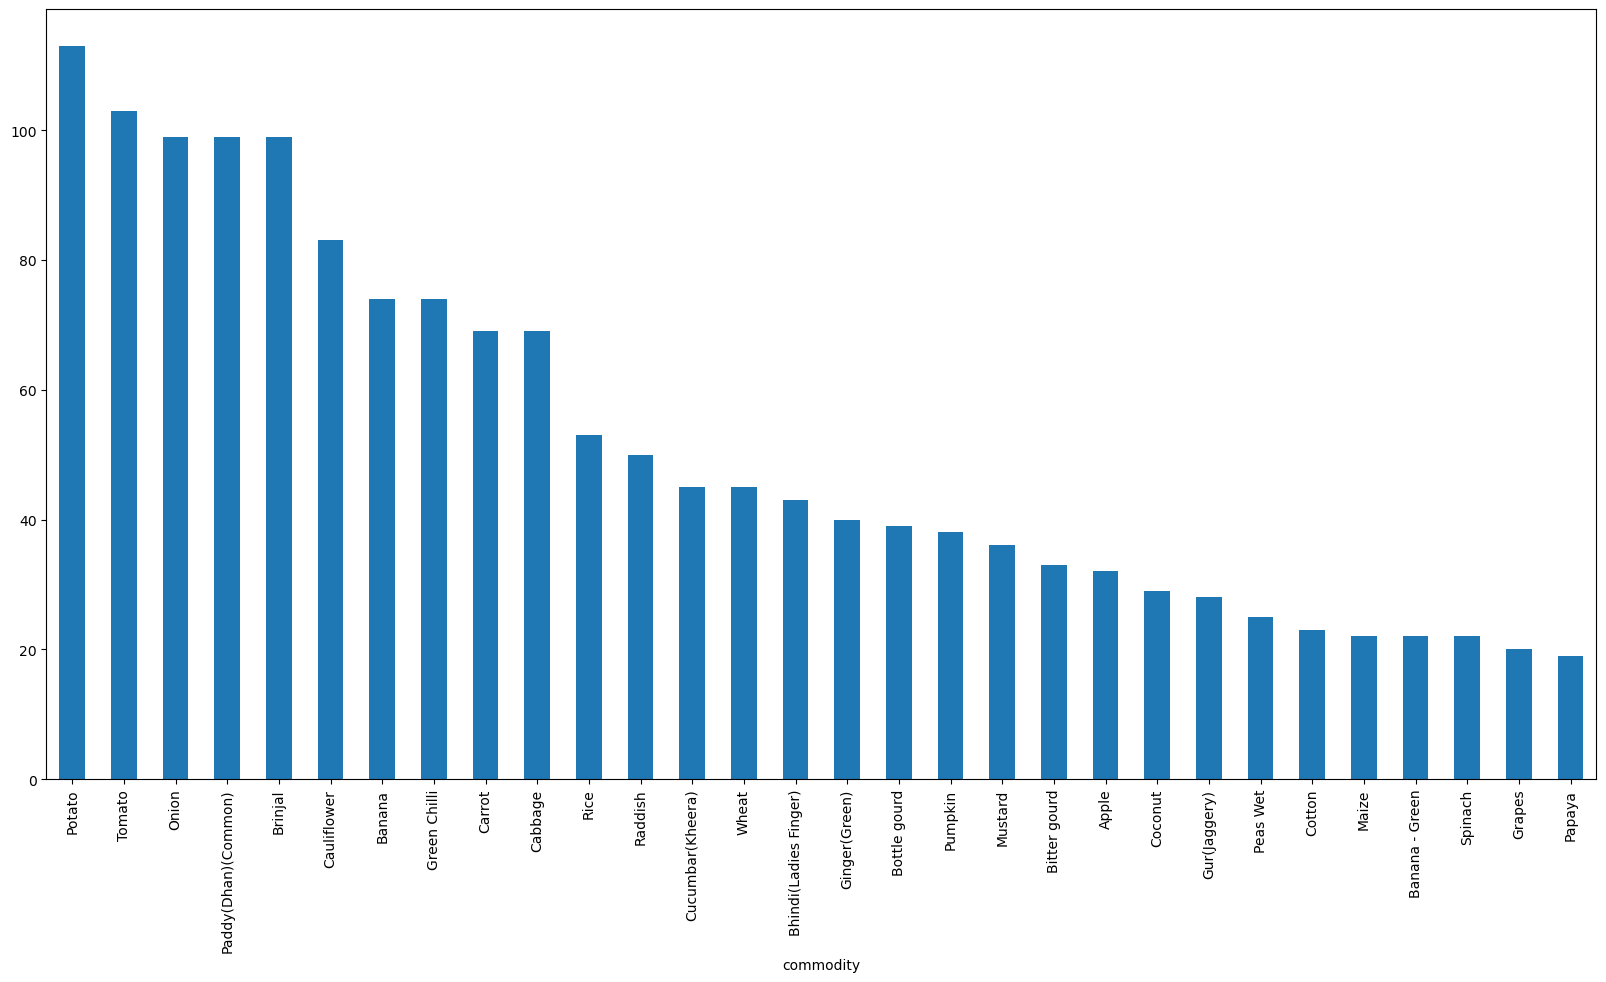

In [10]:
plt.figure(figsize=(20,10))
df['commodity'].value_counts().sort_values(ascending=False).head(30).plot.bar()

Conclusion : This commodities dominates the market most compare the remaining others.

In [11]:
variety_count = df.variety.value_counts()
variety_count_greater_15 = variety_count[variety_count >= 15] 
variety_count_greater_15

variety
Other            1008
Green Chilly       49
Cauliflower        43
Red                43
Carrot             41
Cabbage            35
Local              31
Dara               30
Raddish            30
Deshi              28
Green Ginger       26
Brinjal            25
Tomato             25
Pumpkin            24
Desi               24
Bottle Gourd       23
Cucumbar           23
Potato             21
Banana - Ripe      19
Bhindi             18
ADT 37             17
Fine               16
Jyoti              15
Name: count, dtype: int64

Data Preprocessing

In [3]:
'''df['state'] = LabelEncoder().fit_transform(df['state'])
df['district'] = LabelEncoder().fit_transform(df['district'])
df['market'] = LabelEncoder().fit_transform(df['market'])
df['commodity'] = LabelEncoder().fit_transform(df['commodity'])
df['variety'] = LabelEncoder().fit_transform(df['variety'])'''
encoder = LabelEncoder()
for col in ['state', 'district', 'market', 'commodity', 'variety']:
    df[col] = encoder.fit_transform(df[col])

In [4]:
df['year'] = pd.DatetimeIndex(df['arrival_date']).year
df['month'] = pd.DatetimeIndex(df['arrival_date']).month
df['day'] = pd.DatetimeIndex(df['arrival_date']).day

In [5]:
df = df.drop('arrival_date',axis=1)

In [6]:
df.insert(5, 'day', df.pop('day'))
df.insert(6, 'month', df.pop('month'))
df.insert(7, 'year', df.pop('year'))

In [7]:
df.head()

,state,district,market,commodity,variety,day,month,year,min_price,max_price,modal_price
0,0,153,246,0,17,3,4,2019,6000,8000,7000
1,0,153,246,10,30,3,4,2019,4500,5500,5000
2,0,153,246,18,39,3,4,2019,6000,8000,7000
3,0,153,246,19,148,3,4,2019,6000,8000,7000
4,0,153,246,22,148,3,4,2019,110000,130000,120000


In [8]:
scaler = StandardScaler()
'''df['min_price'] = scaler.fit_transform(df[['min_price']])
df['max_price'] = scaler.fit_transform(df[['max_price']])
df['modal_price'] = scaler.fit_transform(df[['modal_price']])'''
df[['min_price', 'max_price', 'modal_price']] = scaler.fit_transform(df[['min_price', 'max_price', 'modal_price']])

In [9]:
df.corr()

,state,district,market,commodity,variety,day,month,year,min_price,max_price,modal_price
state,1.000000,-0.142571,-0.098200,0.136566,-0.164413,NaN,NaN,NaN,-0.117934,-0.145781,-0.133827
district,-0.142571,1.000000,0.248276,0.015132,0.122858,NaN,NaN,NaN,0.066764,0.075433,0.070286
market,-0.098200,0.248276,1.000000,0.016998,-0.014027,NaN,NaN,NaN,0.036011,0.054511,0.047734
commodity,0.136566,0.015132,0.016998,1.000000,0.263669,NaN,NaN,NaN,-0.147629,-0.149088,-0.149450
variety,-0.164413,0.122858,-0.014027,0.263669,1.000000,NaN,NaN,NaN,0.023394,0.022327,0.020768
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min_price,-0.117934,0.066764,0.036011,-0.147629,0.023394,NaN,NaN,NaN,1.000000,0.975526,0.985341
max_price,-0.145781,0.075433,0.054511,-0.149088,0.022327,NaN,NaN,NaN,0.975526,1.000000,0.994260


In [10]:
df = df.drop(columns=['day','month','year'])

<Axes: >

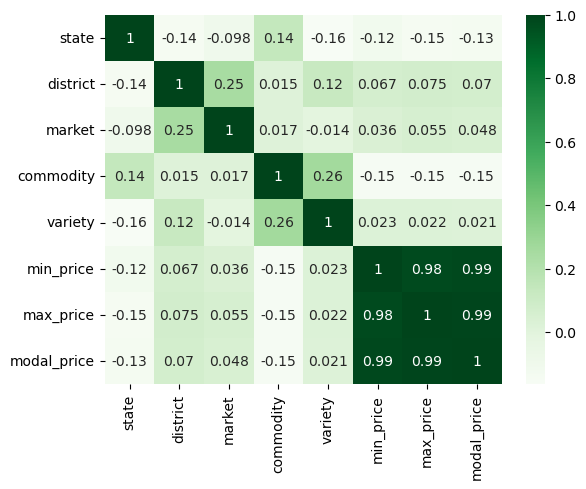

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

Applying K-Means Clustering

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10)
    kmeans.fit(df[['min_price','max_price','modal_price']])
    wcss.append(kmeans.inertia_)

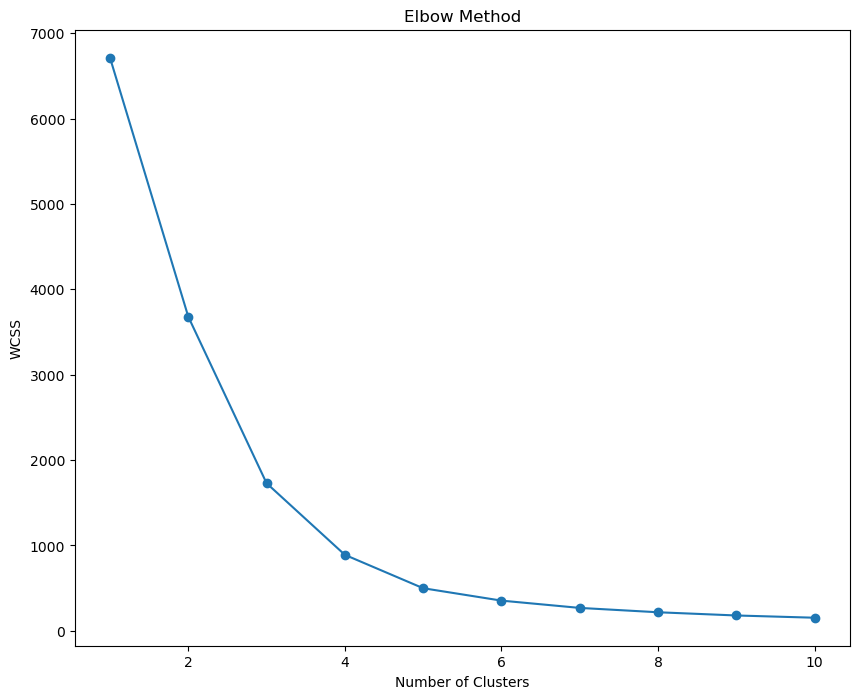

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,init="k-means++",random_state=42,n_init=10)
kmeans.fit(df[['min_price','max_price','modal_price']])

KMeans(n_clusters=3, n_init=10, random_state=42)

In [15]:
df['kmeans cluster'] = kmeans.predict(df[['min_price','max_price','modal_price']])

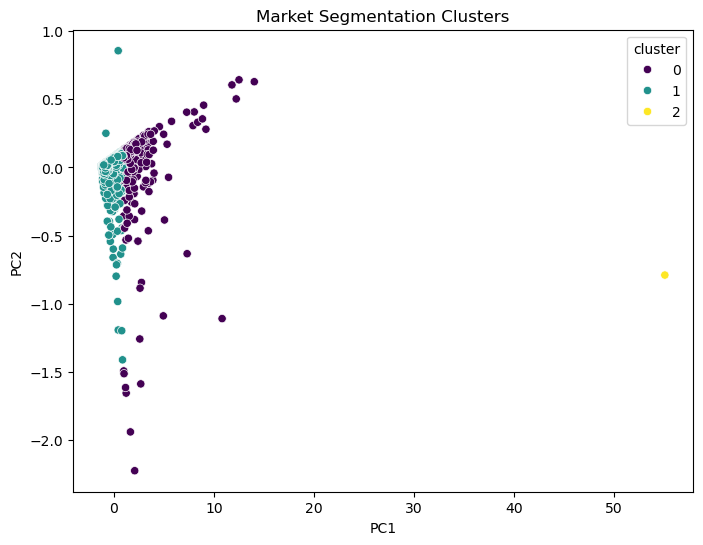

In [16]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['min_price','max_price','modal_price']])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['kmeans cluster']

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Market Segmentation Clusters')
plt.show()

In [18]:
sil_score = silhouette_score(df[['min_price','max_price','modal_price']],df['kmeans cluster'])
print(f"Silhouette Score for KMeans Clustering: {sil_score}")

Silhouette Score for KMeans Clustering: 0.6869758425599808


Applying Hierarchical Clustering

In [20]:
import scipy.cluster.hierarchy as sch

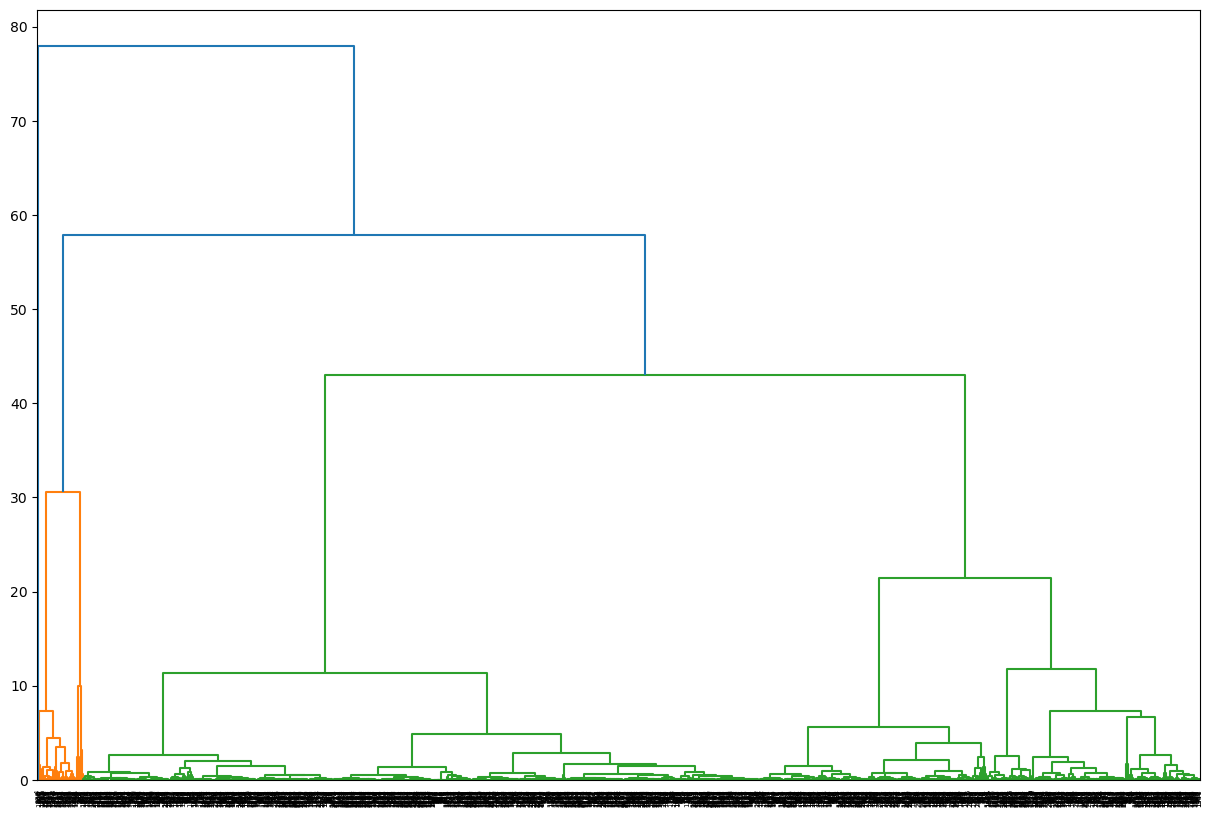

In [21]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df[['min_price','max_price','modal_price']],method='ward'))

In [22]:
agm = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
df['hierarchical cluster'] = df['hierarchical cluster'] = agm.fit_predict(df[['min_price','max_price','modal_price']])

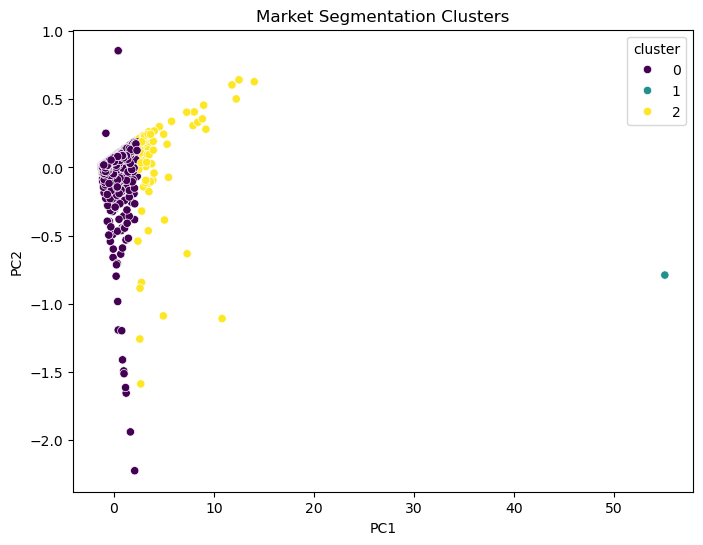

In [24]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['min_price','max_price','modal_price']])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['hierarchical cluster']

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Market Segmentation Clusters')
plt.show()

In [25]:
sil_score = silhouette_score(df[['min_price','max_price','modal_price']],df['hierarchical cluster'])
print(f"Silhouette Score for Hierarchical Clustering : {sil_score}")

Silhouette Score for Hierarchical Clustering : 0.7644238702790914


Applying DBSCAN Clustering

In [26]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
df['dbscan cluster'] = dbscan.fit_predict(df[['min_price','max_price','modal_price']])

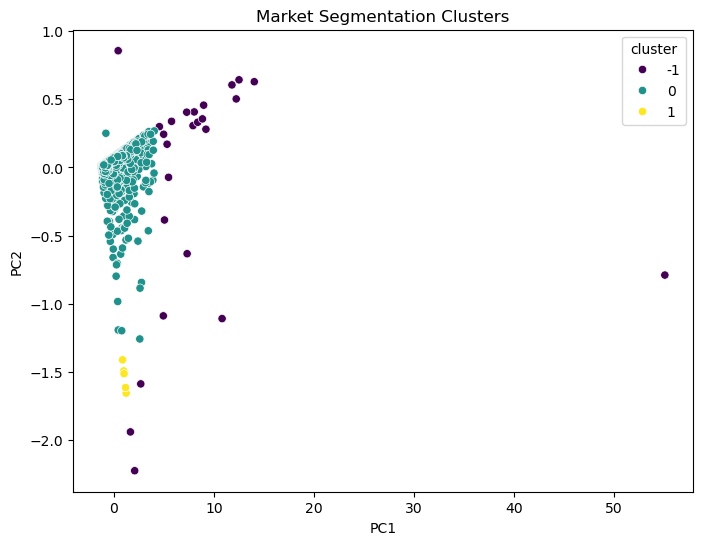

In [29]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['min_price','max_price','modal_price']])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['dbscan cluster']

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Market Segmentation Clusters')
plt.show()

In [30]:
sil_score = silhouette_score(df[['min_price','max_price','modal_price']],df['dbscan cluster'])
print(f"Silhouette Score for DBSCAN Clustering : {sil_score}")

Silhouette Score for DBSCAN Clustering : 0.5146177195197873
